<h1>SVM(Support Vector Machine)</h1>
<br>
<div>
  <ul>
   <p>분류 과제에 사용할 수 있는 강력한 머신러닝 지도학습 모델</p>
   <p>결정 경계(분류를 위한 기준 선)을 정의하는 모델</p>
   <p>결정 경계는 선일수도 평면일수도 있음( 고차원이 될수록 초평면이라고 함 )</p>
   <p>결정 경계는 분리되어야 하는 데이터들로부터 최대한 떨어져있는게 좋음</p>
   <p><span style="font-weight:bold">서포트 벡터 (support vector)</span> : 결정 경계와 가장 가까이 있는 데이터 포인트</p>
   <p><span style="font-weight:bold">마진(margin)</span> : 결정 경계와 서포트 벡터 사이의 거리</p>
  </ul>
</div>

<span style="color:red; font-size:20px"> 장점 </span>
```
1. 서포트 벡터만 잘 선택하면 많은 데이터 포인트를 무시하여 학습 시 빠른 속도를 가짐
2. 분류/예측 사용 가능
3. 예측 정확도가 높음
4. 과적합 정도가 비교적 적음
```
<span style="color:blue; font-size:20px"> 단점 </span>
```
1. 최적화된 모형을 찾기 위해 여러가지 시도를 해봐야함
2. 모형 구축 시간이 오래걸림
3. 결과에 대한 설명력이 떨어짐
```

<p><span style="font-weight:bold">Hard margin</span> : 이상치를 허용하지 않고 결정 경계 생성 -> 과적합의 문제 발생 가능</p>

<p><span style="font-weight:bold">Soft margin</span> : 이상치들은 마진 안에 허용하여 결정 경계 생성 -> 과소적합의 문제 발생 가능</p>

In [37]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
import warnings
warnings.filterwarnings(action='ignore')

In [30]:
# svm 분류
"""
# C의 값으로 오류를 어느정도 허용할 것 인지 설정 ( 기본값은 1 )
# C값이 클수록 하드마진, 작을수록 소프트마진
# kernel은 linear(선형) / poly(다항식) / rbf(가우시안 : 2차원의 점을 무한차원의 점으로 변경)
# gamma는 결정 경계를 얼마나 유연하게 그을 것인지 설정
# gamma값이 크면 결정 경계가 구불구불, 낮으면 직선에 가까운 결정 경계
"""

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


iris_dataset = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size = 0.2) 

# 표준화 
sc = StandardScaler()
sc.fit(X_train)
 
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
 
# 모델 생성
svm_model = SVC(kernel='rbf', C=8, gamma=0.1)
 
svm_model.fit(X_train_std, y_train)
y_pred = svm_model.predict(X_test_std)
# 정확도
print(accuracy_score(y_test, y_pred))

0.9666666666666667


In [31]:
# svm 회귀
"""
svm 회귀는 svc와 반대로 마진안에 최대한 데이터가 많이 들어가게 학습
마진의 폭은 epilson으로 조절 가능
"""
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

data = datasets.load_boston()

X, y = shuffle(data.data, data.target, random_state = 7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

svr = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

y_pred = sv_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse)

46.89011576178491


<h1>KNN(k-Nearest Neighbors)</h1>
<br>
<div>
  <ul>
   <p>가장 가까운 k개의 데이터를 바탕으로 새로운 데이터 예측 및 분류</p>
   <p>분류 모델 생성 시 인접한 k개의 데이터 중 빈도가 높은 레이블을 가짐</p>
   <p>거리를 측정할 때는 euclidian distance 사용</p>
   <p>데이터 사이의 거리를 측정하는 방법과 k의 수가 가장 중요한 매개변수</p>
  </ul>
</div>

<span style="color:red; font-size:20px"> 장점 </span>
```
1. 단순하고 효율적
2. 빠른 훈련 속도
3. 데이터 분류 작업에서 우수한 성능
```
<span style="color:blue; font-size:20px"> 단점 </span>
```
1. 적절한 k를 선택하기 어려움
2. 데이터가 많아지면 속도도 증가
3. 희소한 데이터에 작동이 어려움
```

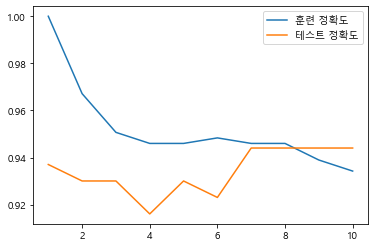

In [38]:
# knn 분류
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

training_accurcy = []
test_accurcy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(X_train, y_train)
    training_accurcy.append(knn.score(X_train, y_train))
    test_accurcy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accurcy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accurcy, label="테스트 정확도")
plt.legend()
plt.show()

<h1>GMM(Gaussian Mixture Model)</h1>
<br>
<div>
  <ul>
   <p>Gaussian 분포가 여러 개 혼합된 clustering 알고리즘</p>
   <p>k개의 Gaussian 분포가 혼합되지만 k는 사용자가 직접 설정</p>
  </ul>
</div>

<span style="color:red; font-size:20px"> 장점 </span>
```
1. 유연하며 다양한 데이터에 적용이 가능
```
<span style="color:blue; font-size:20px"> 단점 </span>
```
1. 군집화를 위한 수행 시간이 오래 걸림
2. 많은 데이터가 필요
```


In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

from sklearn.mixture import GaussianMixture
# n_components로 미리 군집 개수 설정
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(iris.data)

# GMM 후 클러스터링 레이블을 따로 설정
irisDF['gmm_cluster'] = gmm_labels

print(irisDF.groupby('target')['gmm_cluster'].value_counts())

target  gmm_cluster
0       1              50
1       2              45
        0               5
2       0              50
Name: gmm_cluster, dtype: int64


<h1>Naive Bayes Classification</h1>
<br>
<div>
  <ul>
   <p>데이터가 각 클래스에 속할 특징 확률을 계산하는 조건부 확률 기반의 분류 방법</p>
      <p>GaussianNB, BernoulliNB, MultinomialNB 세 가지 분류기 존재</p>
  </ul>
</div>

<span style="color:red; font-size:20px"> 장점 </span>
```
1. 빠르고 효율적
2. 데이터의 크기에 상관없이 동작
```
<span style="color:blue; font-size:20px"> 단점 </span>
```
1. 수치 특징이 많은 데이터에는 부적절
2. 모든 피쳐가 동일하고 독립이라는 가정이 위배되는 경우 많음
```


In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X,y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

gaussian = GaussianNB()

y_pred = gaussian.fit(X_train, y_train)
pred = nb.predict(X_test)    
accuracy = accuracy_score(pred, y_test)   
print(accuracy)

0.9466666666666667
